# Nuclei Segmentation Analysis

In this notebook, we will perform nuclei segmentation on a fluorescence microscopy image using Voronoi-Otsu-Labeling from the `napari-segment-blobs-and-things-with-membranes` library.

## Step 1: Load the Image

We start by loading the image from the local file `human_mitosis_small.png` and extracting the first channel.

StackViewNDArray([[ 8,  8,  8, ...,  9,  9,  9],
                  [ 8,  8,  7, ...,  9,  9,  9],
                  [ 9,  8,  8, ..., 10, 10, 10],
                  ...,
                  [ 9,  8,  8, ...,  9,  9,  8],
                  [ 8,  9,  9, ...,  9,  8,  9],
                  [ 8,  7,  9, ...,  8,  8,  9]], dtype=uint8)
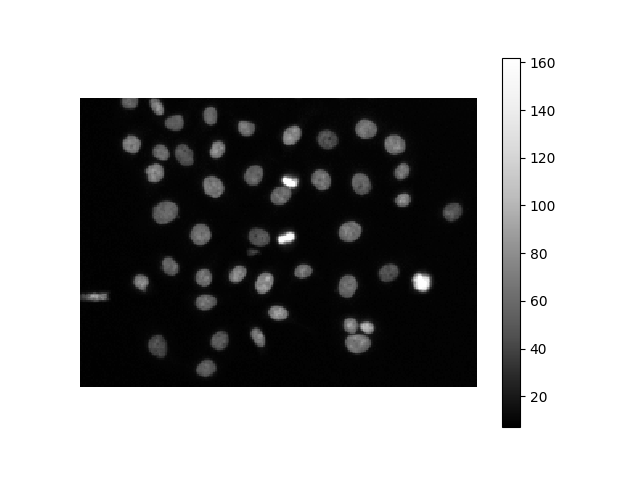
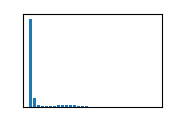

In [1]:
from skimage.io import imread
import numpy as np
import stackview

# Load the image
image = imread('human_mitosis_small.png')

# Extract the first channel
image_channel = image[..., 0]

# Visualize the loaded image
stackview.insight(image_channel)

## Step 2: Apply Voronoi-Otsu-Labeling

We will now segment the image using the Voronoi-Otsu-Labeling method with adjusted parameters.

In [2]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm

# Apply Voronoi-Otsu-Labeling
labeled_image = nsbatwm.voronoi_otsu_labeling(image_channel, spot_sigma=2, outline_sigma=1)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")


## Step 3: Visualize and Save the Results

Finally, we will visualize the labeled image and save it as an RGB PNG to disk for further analysis or visualization.

In [3]:
from skimage import color
from skimage.io import imsave

# Convert labeled image to RGB
rgb_labeled_image = (color.label2rgb(labeled_image, bg_label=0, kind='overlay') * 255).astype(np.uint8)

# Visualize the labeled image
stackview.insight(rgb_labeled_image)

# Save the labeled image
imsave('labeled_nuclei.png', rgb_labeled_image)